# ECS 171 Disccusion 1
## by, Jeffrey Ugochukwu 

## Question 1

Load and Process the Dataset in Pandas and conduct basic regression analysis

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
import seaborn as sns
import seaborn as sb
sns.set()
#Importing Datset as Pandas Dataframe
df = pd.read_csv("data.csv", names = ["x", "y"])
df.head()

,x,y
0,1.2,2.3
1,2.9,3.5
2,7.1,6.4
3,-1.1,-0.9
4,8.7,9.2


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


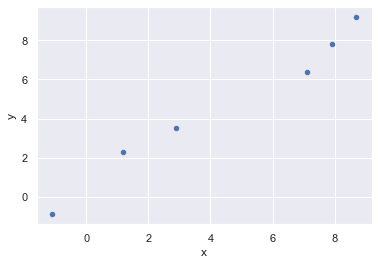

In [13]:
#Plot Dataset
ax1 = df.plot.scatter(x = "x", y = "y")

In [18]:
#Create Linear Regression Model
x = df.iloc[:,0].to_numpy().reshape(-1,1)
y = df.iloc[:,1].to_numpy()
reg = LinearRegression().fit(x,y)
reg

LinearRegression()

In [19]:
#Calculate R^2
reg.score(x,y)

0.9785100047714211

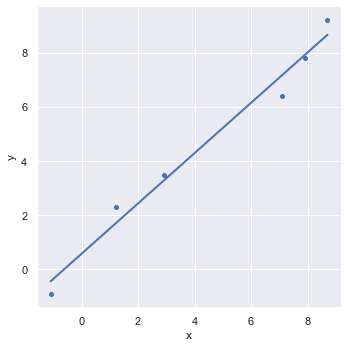

In [23]:
#Fit regression line
sb.relplot(x = "x", y = "y", data = df)
xlimits = [np.amin(x), np.amax(x)]
plt.plot(xlimits, reg.intercept_ + reg.coef_ * xlimits, linewidth = 2)

## Question 2

Prove that the Oridinary Least Squares Regression Equation minimisses the Residual Sum of Squares for the Linear Regression Equation

### Answer:

The matrix equation for the linear regression formula can be simplified as this:

$$ y^{T}y - 2w^{T}X^{y} + w^{T}X^{T}Xw $$

Since we have proven that this is bilinear and symmetric, we can take the derivative and use product role.

$$ -2X^{T}y + 2X^{T}Xw = 0 $$

$$ X^{T}y = X^{T}Xw $$

$$ w = (X^{T}X)^{-1}X^{T}y $$

## Question 3

Create the log table containing these columns and fill out the table for 1 epoch for the dataset provided in the example below. Write your Python code to generate the output. Next, visualize the loss for epoch 1 using a line chart. For this task, you can use matplotlib library. 

In [34]:
#Creating the arrays for our dependent and independent variables
x1 = np.array([4,2,1,3,1,6])
x2 = np.array([1,8,0,2,4,7])
y = np.array([2,-14,1,-1,-7])

#Creating weights
w1 = -0.017
w2 = -0.048
b = 0

#Setting learning rate
learn = 0.05

#Array of value loss from epoch
loss = []
for i in range(5):
    print("x1 = ",x1[i],",x2 = ",x2[i],",y =",y[i])
    #Computing y_hat
    y_hat = b + w1*(x1[i]) + w2*(x2[i])
    print("y_hat =",y_hat)
    #Calculating y - y_hat
    avgy = y[i] - y_hat
    print("y-y_hat = ",avgy)
    #Calculating loss
    big_loss = avgy**2
    print("loss=",big_loss)
    #Storing loss values as a list
    loss.append(big_loss)
    #Finding partial derivatives
    ddy = 2 * avgy
    ddw1 = x1[i]
    ddw2 = x2[i]
    ddb = 1
    #Updating weights
    b = b - (learn * ddy * ddb)
    w1 = w1 - (learn * ddy * ddw1)
    w2 = w2 - (learn * ddy * ddw2)
    print("new b, w1, and w2 are:", b, w1, w2)    

x1 =  4 ,x2 =  1 ,y = 2
y_hat = -0.116
y-y_hat =  2.116
loss= 4.477456
new b, w1, and w2 are: -0.2116 -0.8634000000000001 -0.2596
x1 =  2 ,x2 =  8 ,y = -14
y_hat = -4.0152
y-y_hat =  -9.9848
loss= 99.69623104
new b, w1, and w2 are: 0.78688 1.1335600000000001 7.72824
x1 =  1 ,x2 =  0 ,y = 1
y_hat = 1.9204400000000001
y-y_hat =  -0.9204400000000001
loss= 0.8472097936000003
new b, w1, and w2 are: 0.878924 1.2256040000000001 7.72824
x1 =  3 ,x2 =  2 ,y = -1
y_hat = 20.012216000000002
y-y_hat =  -21.012216000000002
loss= 441.5132212306561
new b, w1, and w2 are: 2.9801456 7.5292688000000005 11.9306832
x1 =  1 ,x2 =  4 ,y = -7
y_hat = 58.2321472
y-y_hat =  -65.2321472
loss= 4255.233028322468
new b, w1, and w2 are: 9.50336032 14.052483520000001 38.02354208


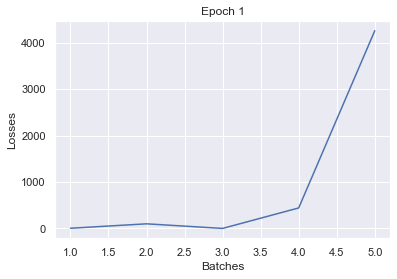

In [35]:
#Visualing losses at Epoch 1

#Assigning 5 batches for array indexing for the x1 and x2 values (x axis)
x_loss = [1,2,3,4,5]
#Assiging the array of loss values for the y axis
y_loss = loss
#Actual plotting
plt.plot(x_loss, y_loss)
plt.title('Epoch 1')
plt.xlabel('Batches')
plt.ylabel('Losses')
plt.show()